In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
cd

C:\Users\HP


In [4]:
model_path = 'ML_PROJECT/models/object_detection1.keras'

# Load the model
model = tf.keras.models.load_model(model_path)

# Print a success message
print('Model loaded successfully')


Model loaded successfully


G:\anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 496 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [5]:
path = 'ML_PROJECT/Test_cars/N147.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output





In [6]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 907
Width of the image = 1070


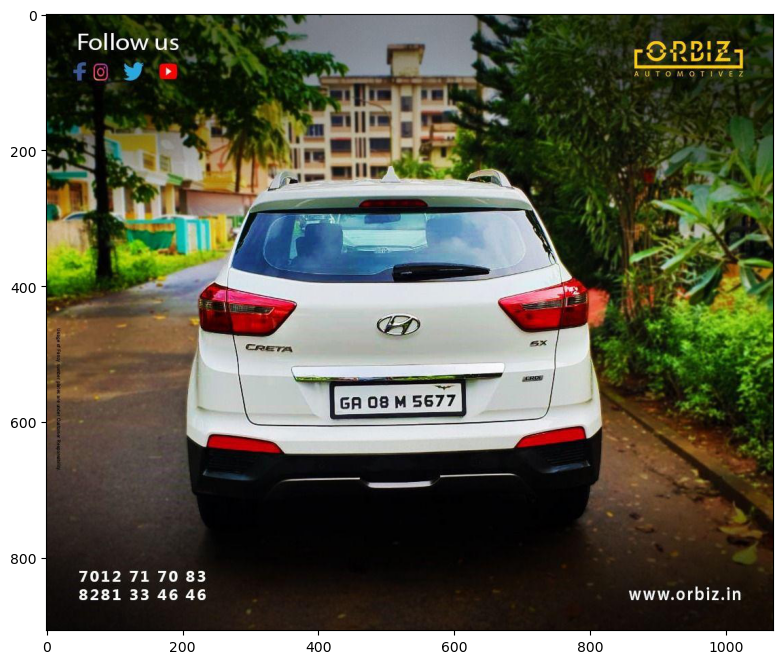

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [8]:
image_arr_224.shape

(224, 224, 3)

In [9]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [11]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


array([[0.39928657, 0.5683071 , 0.6128819 , 0.65881646]], dtype=float32)

In [12]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[427.23662794, 608.08859885, 555.88388228, 597.54652631]])

In [13]:
coords = coords.astype(np.int32)
coords

array([[427, 608, 555, 597]])

(427, 555) (608, 597)


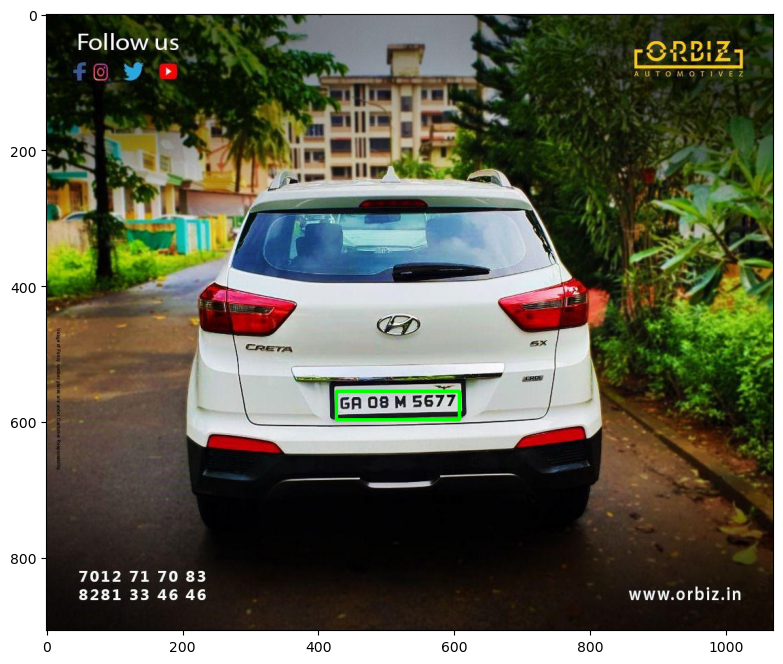

In [14]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [18]:
# create pipeline
path = 'ML_PROJECT/Test_cars/N147.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
(427, 555) (608, 597)


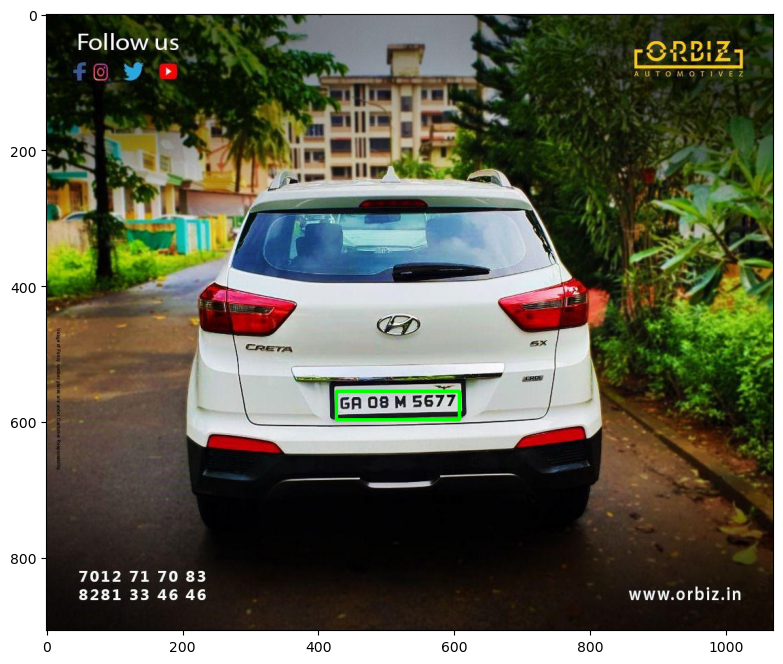

In [19]:
path = 'ML_PROJECT/Test_cars/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
(196, 280) (394, 338)


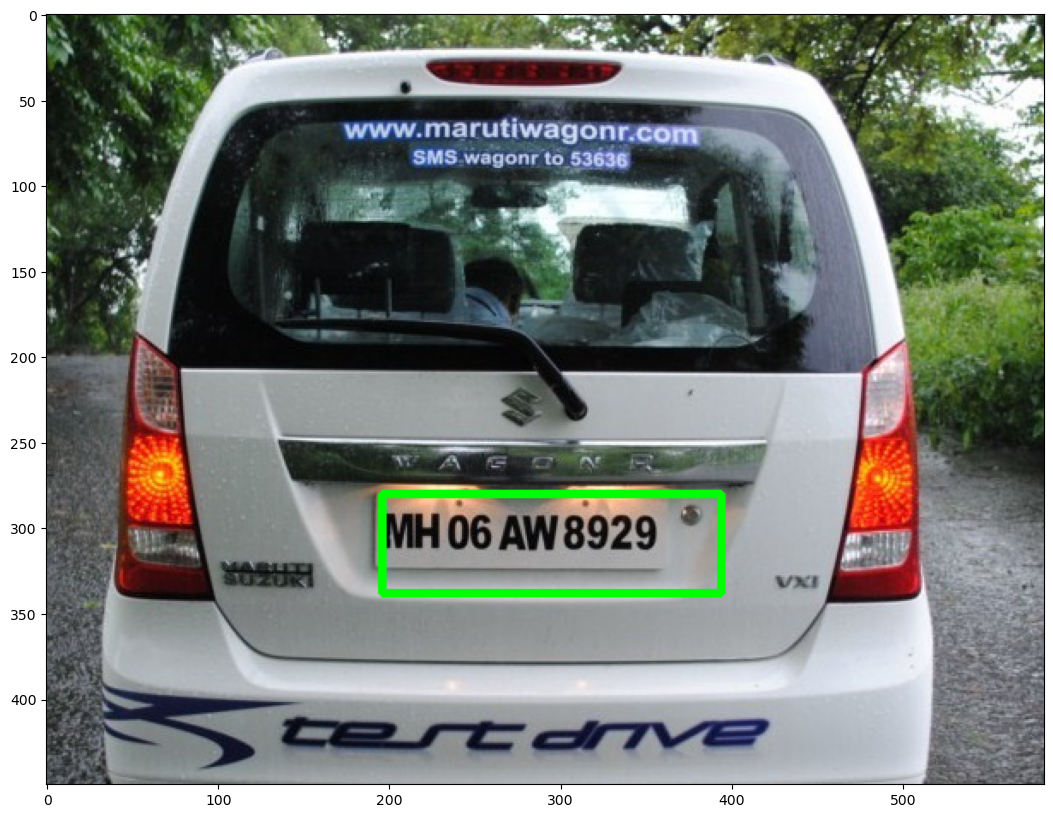

In [80]:
path = 'ML_PROJECT/Test_cars/N245.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(18,10))
plt.imshow(image)
plt.show()

In [81]:
coords = coords.astype(np.int32)
coords

array([[427, 608, 555, 597]])

In [97]:
import numpy as np
from PIL import Image, ImageOps  
img = np.array(Image.open(path))
xmin, xmax, ymin, ymax = cods[0]

roi = img[ymin:ymax, xmin:xmax]


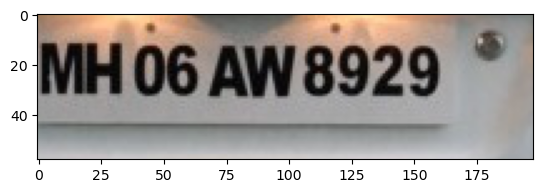

In [98]:
plt.imshow(roi)
plt.show()

In [101]:
import numpy as np
from PIL import Image

# Load the image and convert it to a NumPy array
img = np.array(Image.open(path))

# Assuming 'cods' contains coordinates [xmin, xmax, ymin, ymax] of the ROI
xmin, xmax, ymin, ymax = cods[0]

# Extract the region of interest (ROI) from the image
roi = img[ymin:ymax, xmin:xmax]

# Convert the ROI (NumPy array) back to an image
roi_image = Image.fromarray(roi)

# Specify the path and filename to save the ROI image
output_path = 'ML_PROJECT/Crop_no_plate/crnp1.jpeg'  # Specify your desired output path and filename

# Save the ROI image
roi_image.save(output_path)

# Print a success message
print(f"ROI image saved successfully: {output_path}")


ROI image saved successfully: ML_PROJECT/Crop_no_plate/crnp1.jpeg


In [114]:
import os

# Specify the path to the Tesseract installation directory
tesseract_path = r'C:\Program Files\Tesseract-OCR'

# Set the TESSDATA_PREFIX environment variable
os.environ['TESSDATA_PREFIX'] = tesseract_path + r'\tessdata'


In [115]:
from PIL import Image
import pytesseract

# Specify the path to your cropped license plate image
cropped_image_path = 'ML_PROJECT/Crop_no_plate/crnp1.jpeg'

# Open and display the cropped image using PIL
cropped_img = Image.open(cropped_image_path)
cropped_img.show()  # Display the cropped image

# Perform OCR to extract text from the cropped image
extracted_text = pytesseract.image_to_string(cropped_img)

# Print the extracted text
print(extracted_text)


MH 06 AW8929 *

